In [56]:
#Лабораторная работа №3_3_2
# Сравнение моделей SVM и kNN с логистической регрессией

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Масштабирование данных для SVM и kNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Метрики для SVM:
Accuracy: 0.7455
Precision: 0.8621
Recall: 0.7143
F1-score: 0.7812


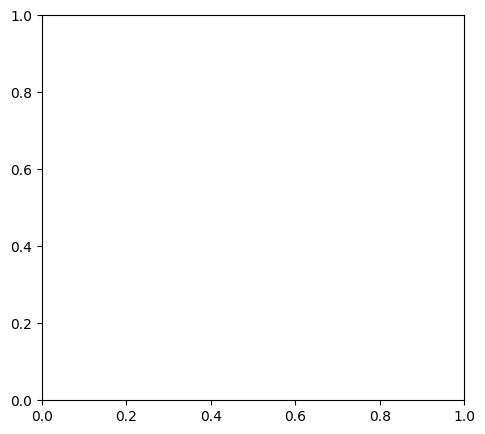

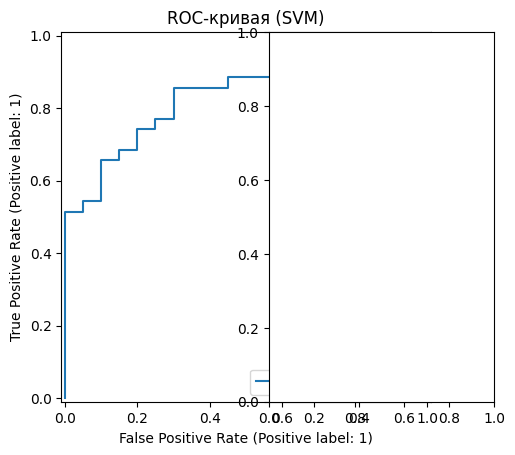

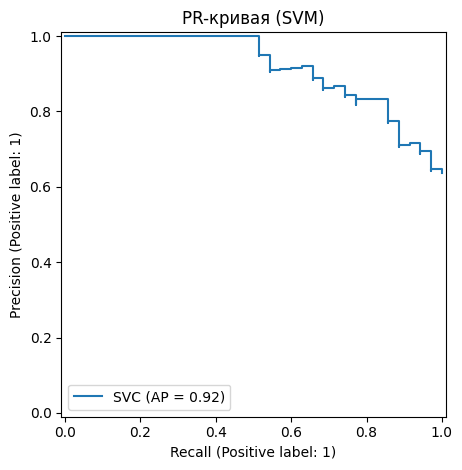

In [57]:
# Модель опорных векторов (SVM)

# Обучение SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
y_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]

# Метрики SVM
print("Метрики для SVM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_svm):.4f}")

# ROC и PR кривые для SVM
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
RocCurveDisplay.from_estimator(svm, X_test_scaled, y_test)
plt.title('ROC-кривая (SVM)')

plt.subplot(1, 2, 2)
PrecisionRecallDisplay.from_estimator(svm, X_test_scaled, y_test)
plt.title('PR-кривая (SVM)')
plt.tight_layout()
plt.show()


Метрики для kNN:
Accuracy: 0.7455
Precision: 0.7692
Recall: 0.8571
F1-score: 0.8108


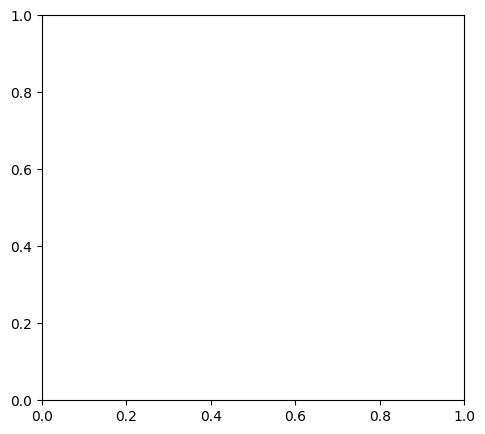

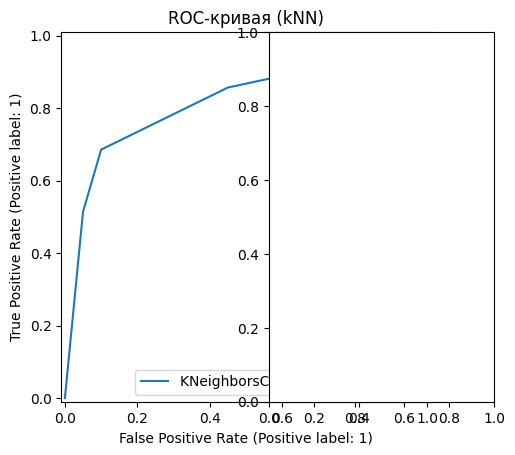

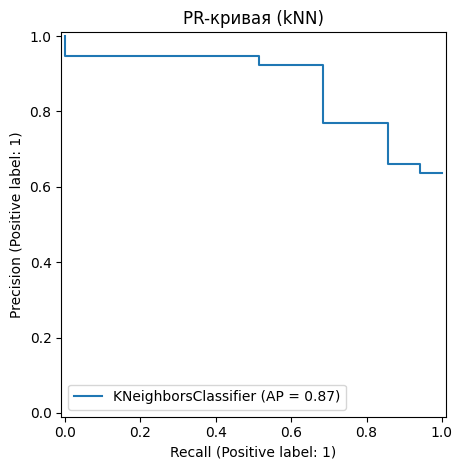

In [58]:
# Модель k-ближайших соседей (kNN)

# Обучение kNN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Метрики kNN
print("\nМетрики для kNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_knn):.4f}")

# ROC и PR кривые для kNN
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
RocCurveDisplay.from_estimator(knn, X_test_scaled, y_test)
plt.title('ROC-кривая (kNN)')

plt.subplot(1, 2, 2)
PrecisionRecallDisplay.from_estimator(knn, X_test_scaled, y_test)
plt.title('PR-кривая (kNN)')
plt.tight_layout()
plt.show()

,Метрика,Логистическая регрессия,SVM,kNN
0,Accuracy,0.690909,0.745455,0.745455
1,Precision,0.781250,0.862069,0.769231
2,Recall,0.714286,0.714286,0.857143
3,F1-score,0.746269,0.781250,0.810811


<Figure size 800x600 with 0 Axes>

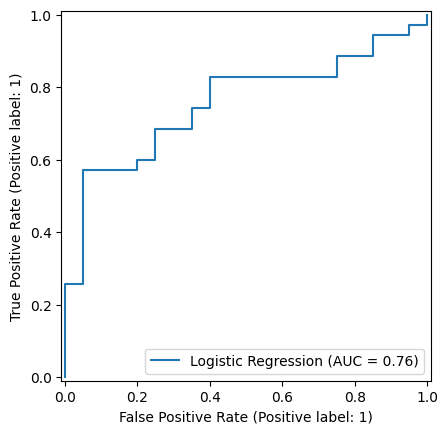

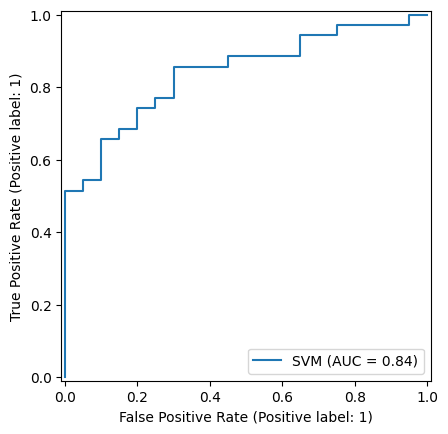

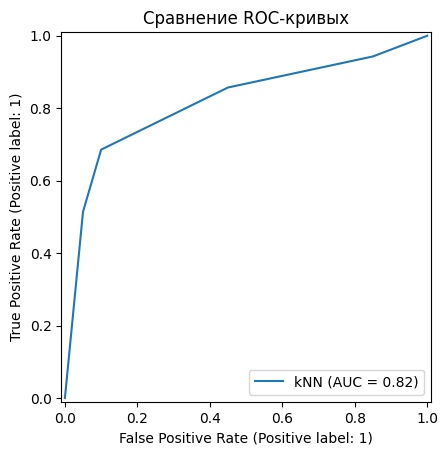

In [59]:
# Сравнение всех трех моделей

# Создаем DataFrame с метриками
metrics_df = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Логистическая регрессия': [accuracy, precision, recall, f1],
    'SVM': [
        accuracy_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_svm)
    ],
    'kNN': [
        accuracy_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_knn)
    ]
})

display(metrics_df)

# Визуализация ROC-кривых всех моделей
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(logreg, X_test, y_test, name='Logistic Regression')
RocCurveDisplay.from_estimator(svm, X_test_scaled, y_test, name='SVM')
RocCurveDisplay.from_estimator(knn, X_test_scaled, y_test, name='kNN')
plt.title('Сравнение ROC-кривых')
plt.show()

In [60]:
# Вывод о наилучшей модели
print("\nВывод о наилучшей модели:")
print("1. Логистическая регрессия показала следующие результаты:")
print(f"   - Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}")
print("2. SVM показала следующие результаты:")
print(f"   - Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}, F1-score: {f1_score(y_test, y_pred_svm):.4f}")
print("3. kNN показала следующие результаты:")
print(f"   - Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}, F1-score: {f1_score(y_test, y_pred_knn):.4f}")

best_model = max([
    ('Logistic Regression', f1),
    ('SVM', f1_score(y_test, y_pred_svm)),
    ('kNN', f1_score(y_test, y_pred_knn))
], key=lambda x: x[1])

print(f"\nНаилучшая модель по F1-score: {best_model[0]} с показателем {best_model[1]:.4f}")


Вывод о наилучшей модели:
1. Логистическая регрессия показала следующие результаты:
   - Accuracy: 0.6909, F1-score: 0.7463
2. SVM показала следующие результаты:
   - Accuracy: 0.7455, F1-score: 0.7812
3. kNN показала следующие результаты:
   - Accuracy: 0.7455, F1-score: 0.8108

Наилучшая модель по F1-score: kNN с показателем 0.8108
